[link](https://apps.skillfactory.ru/learning/course/course-v1:SkillFactory+DST-3.0+28FEB2021/block-v1:SkillFactory+DST-3.0+28FEB2021+type@sequential+block@29ed5429ee004272a1a9316d6f1c9b31/block-v1:SkillFactory+DST-3.0+28FEB2021+type@vertical+block@f869babfd7654af787940d7a9ad85da6)

Ранее мы использовали тестовый набор не только для проверки итогового качества, но и для подбора внешних параметров. Вспомните: мы выбирали оптимальные пороги вероятности и коэффициенты регуляризации, при которых наблюдался максимум целевой метрики (мы использовали F1-меру). 

Однако такой подход не совсем корректен, ведь мы подстраивали модель под тестовую выборку, то есть по сути занимались небольшим самообманом. Тестовая выборка должна быть «независимым судьёй», который объективно и непредвзято «выносит приговор» нашей модели.

Из-за этого в больших Data Science-проектах используются не два, а три набора данных: в дополнение к тренировочному и тестовому наборам данных выделяется валидационный набор (validation data). Этот набор используется для промежуточного контроля качества модели и настройки внешних параметров, которые задаёт исследователь при построении модели. Такой подход называется трёхкомпонентным.

На валидационной выборке мы производим подбор гиперпараметров — внешних параметров модели, например коэффициентов регуляризации, максимальной глубины дерева, количества деревьев в случайном лесу и т. д.



[О типах данных и их разделении](https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets)

В промышленности, научных кругах и различной литературе термины валидационная и тестовая выборка зачастую употребляются как синонимы. Строго говоря, они не являются таковыми.

Тестирование — это попытка что-то выяснить, а валидация — доказать, что что-то является истиной (в нашем случае — доказать, что качество модели на валидационной выборке совпадает с качеством при обучении).

Вне зависимости от того, как будут называться контрольные выборки, важная концепция, которую необходимо сохранить, состоит в том, что окончательный набор (называемый тестом или валидацией) не используется в процессе обучения модели, а используется исключительно для оценки её качества.

Процесс проверки предсказательной способности модели машинного обучения называется валидацией.

Рассмотрим основные методы валидации данных на примере нашего набора данных ↓

HOLD-OUT

Метод hold-out (отложенная выборка) нам уже знаком. Это самый простой и очень популярный метод.

Его идея состоит в том, что для проверки модели мы просто случайным образом разбиваем весь набор данных на обучающую, валидационную и тестовую выборки (последняя — по желанию).

Обычно разбиение производится в соотношении 70/30 или 80/20 при двухкомпонентном подходе, и в соотношении 70/15/15 или 80/10/10 — при трёхкомпонентном.

Схема разбиения представлена ниже:

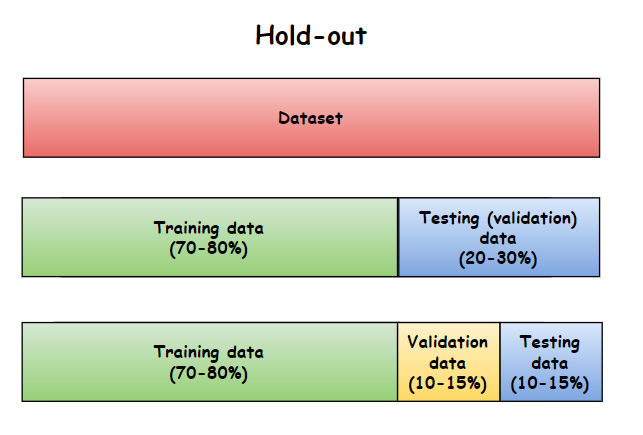

ПРЕИМУЩЕСТВА И НЕДОСТАТКИ HOLD-OUT

Img

Очень простой и понятный.
Чаще всего применяется на больших датасетах, так как требует значительно меньше вычислительных мощностей, чем другие методы.

Img

Важно помнить, что разбиение производится случайным образом и оценка в этом методе зависит от того, какие наблюдения попали в набор для валидации. Это плохо, так как возможна ситуация, когда распределение целевого признака в тренировочной, валидационной (и тестовой) выборках может значительно различаться, и оценка качества может быть необъективной.

РЕАЛИЗАЦИЯ МЕТОДА В SKLEARN

Все методы разбиения выборки и валидации, которые мы будем изучать, находятся в модуле model_selection, мы импортировали его заранее.

Метод hold-out реализован в уже знакомой вам функции train_test_split(). Она предназначена для разбиения исходного набора данных случайным образом на две части в заданных соотношениях.

Основные параметры train_test_split():

*arrays — порядковый аргумент с переменным количеством. Набор массивов (это могут быть списки, numpy-массивы, DataFrame), которые подлежат разбиению.
test_size — размер тестовой (валидационной) выборки. Может быть указан в долях. Если параметр train_size задан дробным числом с плавающей точкой, то параметр test_size определяется автоматически как 1-train_size.
train_size — размер тренировочной выборки. Может быть указан в долях. Если параметр test_size задан дробным числом с плавающей точкой, то параметр train_size определяется автоматически как 1-test_size.
random_state — число, на основе которого производится генерация случайных чисел.
shuffle — параметр, указывающий, стоит ли перемешивать выборку перед разбиением (по умолчанию True).
stratify — стратифицированное разбиение (о нём мы поговорим в юните по дисбалансу выборки).
Если мы используем двухкомпонентный подход (разбиваем выборку на тренировочную и валидационную, она же тестовая), то всё очень просто: нам лишь нужно вызвать функцию train_test_split() и передать в неё матрицу наблюдений X и вектор-столбец с правильными ответами y.

Для примера разделим выборку в соотношении 80/20 (test_size=0.2), в качестве значения параметра random_state по традиции возьмём число 42.

K-FOLD

Метод k-fold более известен как кросс-валидация (cross validation), или перекрёстный контроль.

Пожалуй, это самый популярный метод валидации для оценки качества моделирования, и он используется практически во всех проектах. Эта идея также применяется во многих моделях и методах машинного обучения, например в стекинге.

Алгоритм кросс-валидации:

Разбить исходную выборку на k частей — фолдов (fold).
Повторять k раз:
Обучить модель на k-1 частях. Назовём их тренировочными фолдами (training fold). 
Произвести оценку качества (вычислить метрику) на оставшейся части. Назовем её валидационным фолдом (validation fold).
Усреднить значения метрики на валидационных фолдах.
На рисунке ниже представлена схема работы кросс-валидации с предварительно выделенной для тестирования выборкой, то есть первоначально весь датасет разделяется на тренировочную и тестовую (отложенную) выборки. Тестовые данные (testing data) используются только для финального контроля качества и сравнения моделей между собой. Тренировочные данные (training data) используются для кросс-валидации, разделяясь при каждой итерации на тренировочные и валидационные фолды (training fold и validation fold):

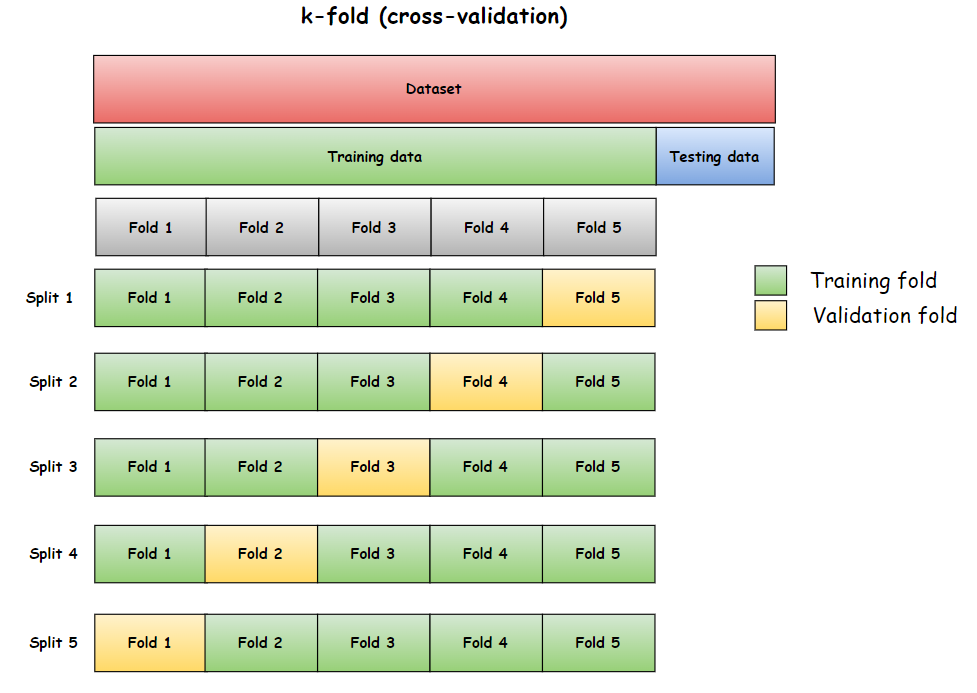

Благодаря такому подходу мы избавляемся от необходимости создавать отложенную валидационную выборку — мы генерируем её искусственно на каждом из этапов кросс-валидации из исходного набора данных. Каждая из  частей исходного обучающего набора данных используется в качестве валидационной выборки.

Для больших наборов данных в качестве значения  часто берут 10, то есть выборка разбивается на десять фолдов. В случае маленьких выборок  берут равным 3 или 5.

→ Чем больше , тем больше моделей будут обучаться, тем объективнее будет оценка качества, однако тем больше времени займёт процесс валидации.

ПРЕИМУЩЕСТВА И НЕДОСТАТКИ K-FOLD

Img

Подход позволяет получить более устойчивую к выбросам оценку качества модели, так как модель обучается на нескольких независимых наборах данных.
Значения метрик получаются более объективными, ведь мы обучаем одну модель  раз — у нас получается  независимых друг от друга значений метрики.
Примечание. Мы оцениваем метрику не по одному значению на валидационной выборке, как это было в hold-out, а по  значений. Если  достаточно велико, можно даже построить гистограмму и оценить, в каких пределах находится истинное качество. Однако на практике этим занимаются крайне редко, так как такие вычисления очень времязатратны.

Img

Подход предусматривает, что мы обучаем одну и ту же модель  раз, что, очевидно, плохо сказывается на производительности. Если модель обучается довольно медленно (например, сложная нейронная сеть), то валидация может занять очень много времени.

РЕАЛИЗАЦИЯ МЕТОДА В SKLEARN

В библиотеке sklearn метод k-fold реализован в классе KFold.

Основные параметры инициализатора KFold:

n_split — число фолдов (число  из метода k-fold). По умолчанию — 5.
shuffle — параметр, указывающий, стоит ли перемешивать исходный набор данных перед разбиением. По умолчанию — False.
random_state — число, на основе которого производится генерация случайных чисел, если набор данных будет перемешиваться.
У объекта класса KFold есть метод split(). В данный метод необходимо передать матрицу наблюдений X и вектор-столбец ответов y — метод вернёт генератор, который позволит получать индексы тренировочной и валидационной выборок, сгенерированных по методу k-fold.

Будем использовать двухкомпонентный контроль, то есть подавать в кросс-валидацию весь доступный набор данных без предварительного выделения тестовой выборки.

Создадим объект KFold для кросс-валидации с пятью фолдами, остальные параметры оставим по умолчанию. Затем организуем цикл for для получения элементов из генератора, созданного с помощью метода split(). На каждой итерации в переменных train_index и valid_index будут находиться индексы текущей тренировочной и валидационной выборок соответственно.

В цикле будем:

выделять строки таблицы, относящиеся к текущим тренировочной и валидационной выборкам, в отдельные таблицы;
обучать дерево решений;
делать предсказания для текущих тренировочной и валидационной выборок;
рассчитывать метрику accuracy на текущих выборках и заносить её значение в список.

In [ ]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
#Создаём список для хранения тренировочных и валидационных метрик
train_metrics = []
val_metrics = []
#Организуем цикл для кросс-валидации (используем весь набор данных)
#train_index — индексы тренировочной выборки
#valid_index — индексы валидационной выборки
for train_index, valid_index in kf.split(X, y): 
    #Создаём тренировочную и валидационную выборку, обращаясь по текущим индексам
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_valid, y_valid = X.iloc[valid_index], y.iloc[valid_index]
    #Обучаем дерево решений на тренировочной выборке
    model.fit(X_train, y_train)
    #Делаем предсказание для каждой из выборок
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    #Рассчитываем метрику и заносим её в список
    train_metrics.append(metrics.accuracy_score(y_train, y_train_pred))
    val_metrics.append(metrics.accuracy_score(y_valid, y_valid_pred))

#Выведем содержимое массивов train_metrics и val_metrics:

    print(train_metrics)
print(val_metrics)
 
## [0.8034351145038168, 0.8168637924456315, 0.8027470431133156, 0.8267836703548264, 0.8157191911484166]
## [0.7957317073170732, 0.7053435114503817, 0.7358778625954199, 0.7282442748091603, 0.732824427480916]

# В каждом из выведенных списков содержится по пять значений метрики accuracy, вычисленных на тренировочном и валидационном фолдах кросс-валидации. Для агрегированной оценки рассчитаем среднее значение метрик:

print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(train_metrics)))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(val_metrics)))
 
## Train k-fold mean accuracy: 0.81
## Valid k-fold mean accuracy: 0.74


Итак, среднее значение метрики accuracy на кросс-валидации равно 0.81 для тренировочных фолдов и 0.74 — для валидационных фолдов. Помним о том, что основной показатель для нас — метрика на валидационных фолдах (если не предусмотрена тестовая выборка). 

Примечание. Если количество фолдов больше 30, вы можете построить доверительный интервал для среднего значения метрики. О доверительных интервалах мы говорили в модуле по A/B-тестированию.

 На самом деле весь приведённый выше код можно значительно сократить, если использовать специальную функцию для кросс-валидации — cross_validate() из модуля model_selection. Она организует процедуру кросс-валидации и расчёт метрик.

Основные параметры функции cross_validate():

estimator — модель, качество которой будет проверяться на кросс-валидации.
X — матрица наблюдений.
y — вектор-столбец правильных ответов.
cv — кросс-валидатор из библиотеки sklearn (например, KFold) или количество фолдов, на которые необходимо разбить выборку. По умолчанию используется кросс-валидация на пяти фолдах.
scoring — название метрики в виде строки либо функция для её вычисления ('accuracy', 'precision', 'recall', 'f1' и другие; полный список — в документации к функции).
return_train_score — параметр, указывающий стоит ли возвращать значения метрики, полученные на тренировочных фолдах. По умолчанию — False, то есть метрики считаются только на валидационных фолдах.

Функция возвращает словарь со следующими ключами:

fit_time — время обучения модели на каждой итерации кросс-валидации;
score_time — время вычисления метрик на каждой итерации кросс-валидации;
test_score — значения метрик на валидационных фолдах;
train_score — значения метрик на тренировочных фолдах.
Итоговый код с использованием функции cross_validate() будет выглядеть следующим образом:

In [ ]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)

# В массивах, хранящихся по ключам train_score и test_score, содержится по пять значений метрики accuracy, полученных на тренировочных и валидационных фолдах соответственно на каждой итерации кросс-валидации. Давайте рассчитаем среднее и сравним его с результатом, полученным ранее:

print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))
 
## Train k-fold mean accuracy: 0.81
## Valid k-fold mean accuracy: 0.74

LEAVE-ONE-OUT

Метод leave-one-out (отложенный пример), или поэлементная кросс-валидация — это частный случай кросс-валидации (k-fold), когда размер  равняется размеру всей выборки , где  — количество примеров (строк в таблице).

Алгоритм метода:

Повторять  раз:
Выбрать один случайный пример для валидации.
Обучить модель на всех оставшихся n-1 примерах.
Произвести оценку качества (вычислить метрику) на отложенном примере.
Усреднить значение метрик на всех примерах.

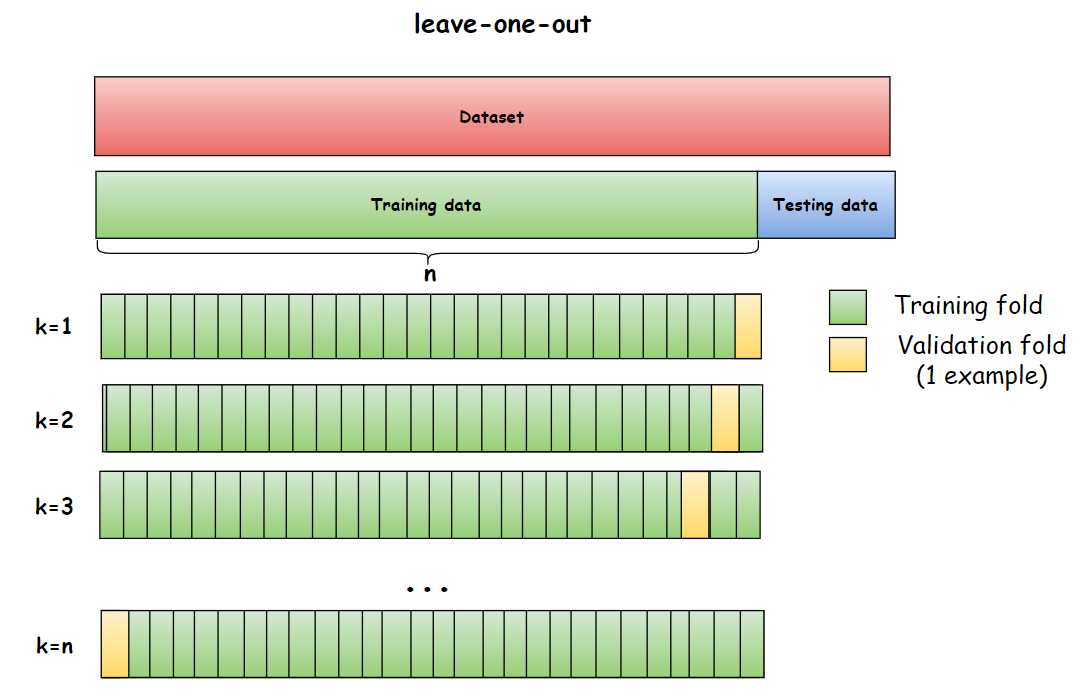

ПРЕИМУЩЕСТВА И НЕДОСТАТКИ LEAVE-ONE-OUT

Img

Идеально подходит для небольших датасетов (менее 100 примеров).
Поскольку все доступные данные используются как для обучения, так и для валидации, значения метрик наиболее объективны и надёжны.
Img

Подход предусматривает, что мы обучаем одну и ту же модель  раз. Очевидно, что чем больше примеров в обучающем наборе данных, тем больше моделей мы будем обучать. Поэтому метод не подходит для оценки качества модели на больших наборах данных, поскольку становится очень ресурсозатратным.
Примечание. Тем не менее в некоторых методах обучения вычисление leave-one-out получается заметно ускорить, и его использование становится возможным.

РЕАЛИЗАЦИЯ МЕТОДА В SKLEARN

В библиотеке sklearn метод leave-one-out реализован в классе LeaveOneOut. Параметров инициализации у данного класса нет.

Работа с кросс-валидатором полностью идентична работе с KFold, который мы рассматривали ранее (цикл для организации кросс-валидации вручную будет выглядеть аналогично).

Объект класса LeaveOneOut также можно передать в функцию cross_validate() для получения метрик на каждом из примеров. В случае с метрикой accuracy список будет состоять из 0 и 1 (0 — модель не угадала класс на отложенном примере, 1 — модель угадала класс на отложенном примере).

Так как датасет у нас довольно большой (более трёх тысяч образцов воды), алгоритм кросс-валидации leave-one-out будет выполняться очень долго. Для экономии времени выполнения кода будем использовать первые 500 наблюдений из исходной таблицы.

Примечание. Значение метрики будет рассчитано не для всего набора данных, а только для его части. Если вы захотите рассчитать метрику на всём наборе данных, вместо среза передавайте в функцию таблицу X и столбец y целиком. Но имейте в виду, что код в таком случае может выполняться до нескольких минут.

In [ ]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём кросс-валидатор LeaveOneOut
loo = model_selection.LeaveOneOut()
 
#Считаем метрики на кросс-валидации leave-one-out
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X.iloc[:500], #матрица наблюдений X
    y=y.iloc[:500], #вектор ответов y
    cv=loo, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
 
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))
 
## Train k-fold mean accuracy: 0.95
## Valid k-fold mean accuracy: 0.90

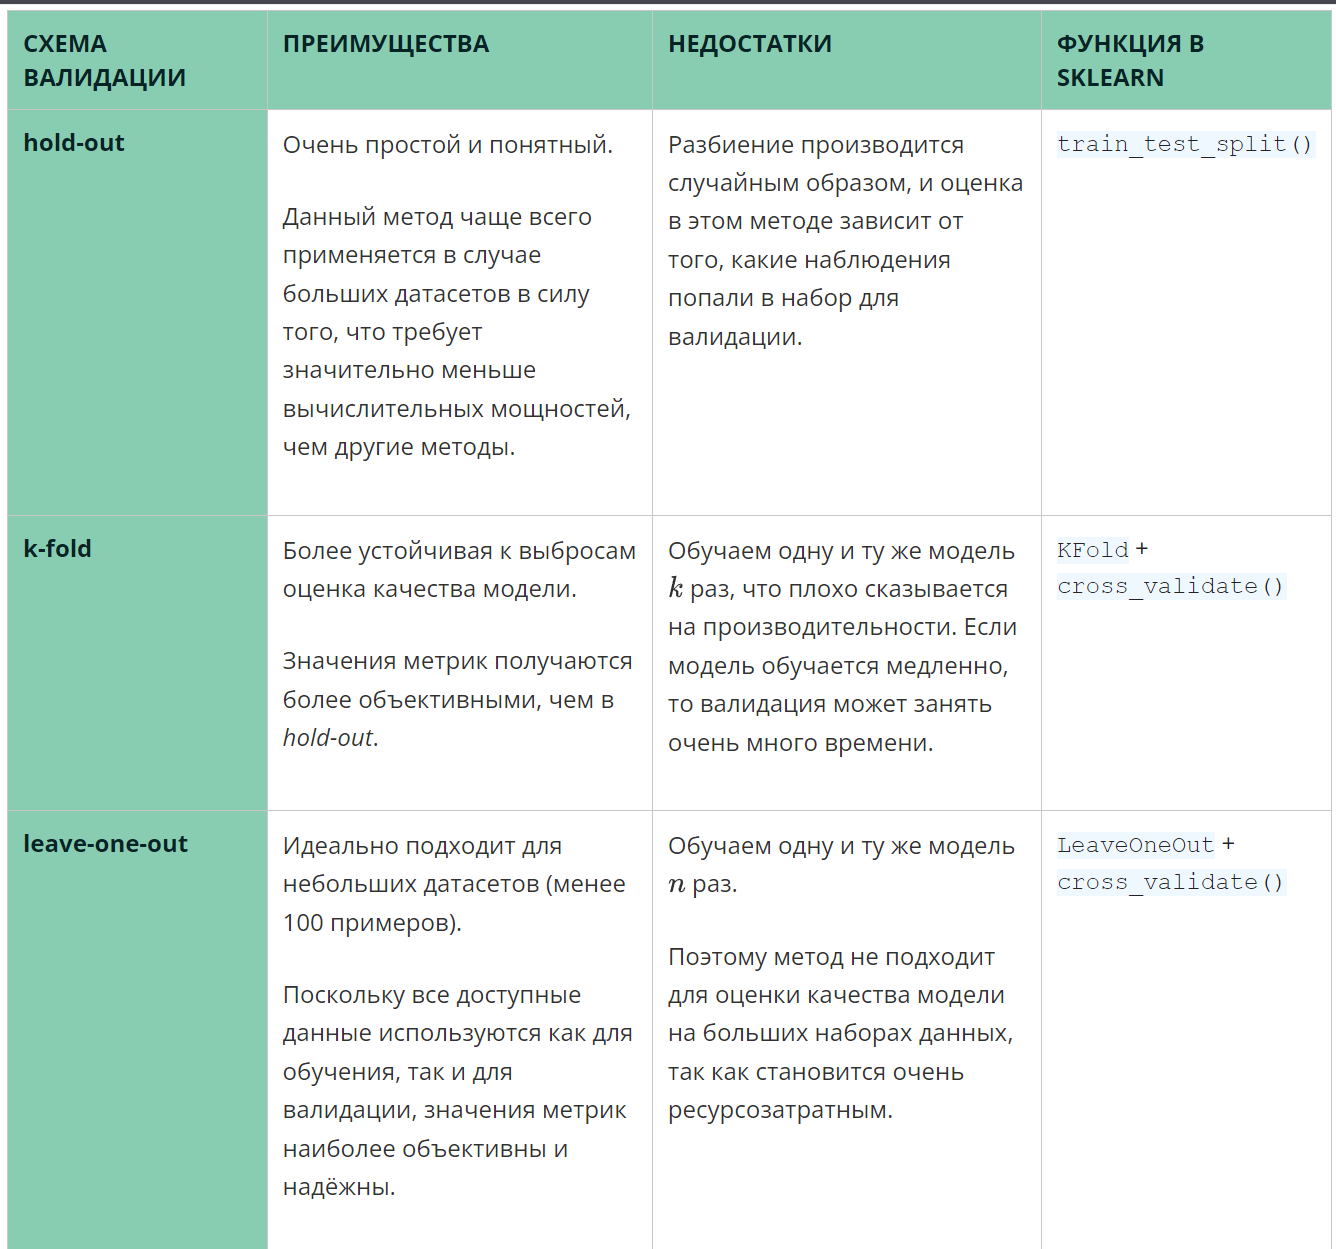